# Bayesian Linear Regression
- https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5
- https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e
- https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb

## Exploratory Data Analysis

### Import Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib & Seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9,9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

# Standard ML models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics for analyzing models
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Import Data & Examine

In [2]:
df = pd.read_csv('https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/bayesian_lr/data/student-mat.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
# Filter out grades that were 0
df = df[~df['G3'].isin([0,1])]
df['G3'].value_counts(dropna=False)

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
7      10
6       3
19      2
5       1
Name: G3, dtype: int64

In [4]:
df = df.rename(columns={'G3':'Grade'})
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.shape

(633, 33)

***
**Describe Numberic Columns**

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,16.720379,2.519747,2.320695,1.563981,1.941548,0.206951,3.932070,3.169036,3.184834,1.489731,2.268562,3.527646,3.751975,11.503949,11.756714,12.205371
std,1.214044,1.133497,1.102284,0.750167,0.833284,0.579023,0.946411,1.047082,1.162014,0.912452,1.281776,1.448355,4.662003,2.682645,2.629715,2.656882
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,12.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


***
**Value Counts for Categorical Columns**

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:',col,)
        print(df[col].value_counts(dropna=False))


Column Name: school
GP    421
MS    212
Name: school, dtype: int64

Column Name: sex
F    376
M    257
Name: sex, dtype: int64

Column Name: address
U    446
R    187
Name: address, dtype: int64

Column Name: famsize
GT3    443
LE3    190
Name: famsize, dtype: int64

Column Name: Pstatus
T    555
A     78
Name: Pstatus, dtype: int64

Column Name: Mjob
other       249
services    135
at_home     131
teacher      70
health       48
Name: Mjob, dtype: int64

Column Name: Fjob
other       359
services    175
at_home      41
teacher      35
health       23
Name: Fjob, dtype: int64

Column Name: reason
course        279
home          146
reputation    141
other          67
Name: reason, dtype: int64

Column Name: guardian
mother    444
father    149
other      40
Name: guardian, dtype: int64

Column Name: schoolsup
no     566
yes     67
Name: schoolsup, dtype: int64

Column Name: famsup
yes    393
no     240
Name: famsup, dtype: int64

Column Name: paid
no     595
yes     38
Name: paid, dty

***
**Distribution of Grades**

In [8]:
df['Grade'].describe()

count    633.000000
mean      12.205371
std        2.656882
min        5.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: Grade, dtype: float64

In [9]:
df['Grade'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
7      10
6       3
19      2
5       1
Name: Grade, dtype: int64

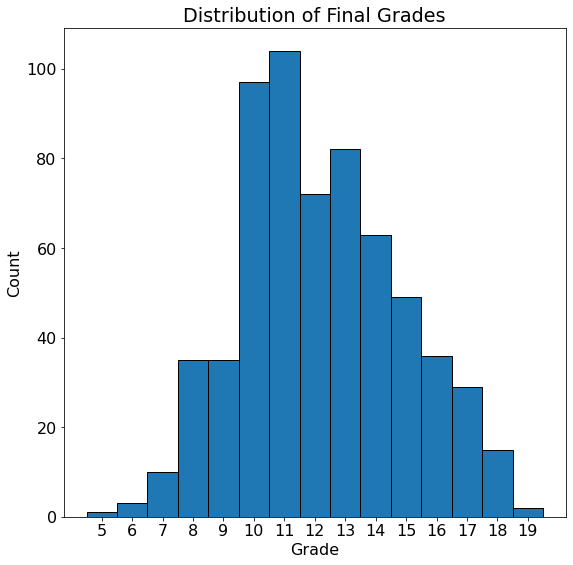

In [10]:
# Bar plot of grades
plt.bar(df['Grade'].value_counts().index,
        df['Grade'].value_counts().values,
        fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(5,20)));

***
**Grade Distribution by Different Categorical Variables**

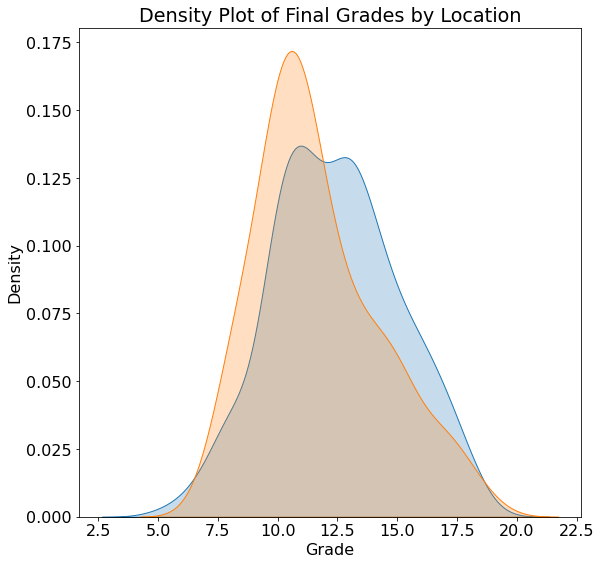

In [11]:
# Grade distribution by address
sns.kdeplot(df[df['address']=='U']['Grade'],label='Urban',shade = True)
sns.kdeplot(df[df['address']=='R']['Grade'],label='Rural',shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');

Text(0.5, 1.0, 'Density Plot of Final Grades by Guardian')

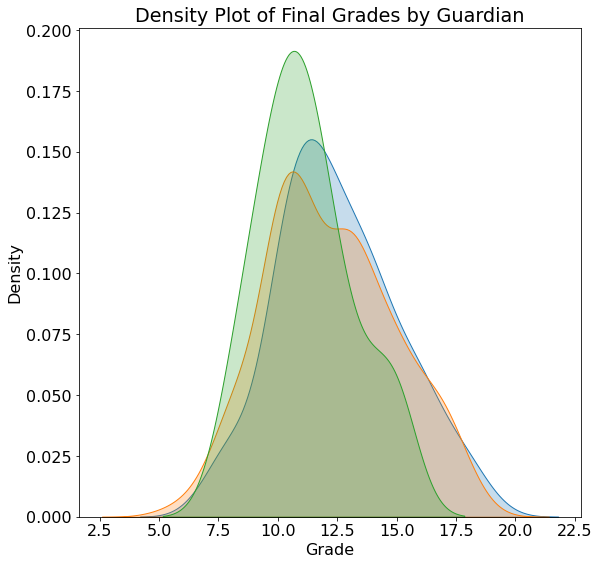

In [12]:
# Grade distribution by Guardian
sns.kdeplot(df[df['guardian']=='father']['Grade'],label='Father',shade=True)
sns.kdeplot(df[df['guardian']=='mother']['Grade'],label='Mother',shade=True)
sns.kdeplot(df[df['guardian']=='other']['Grade'],label='Other',shade=True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Guardian')

Text(0.5, 1.0, 'Density Plot of Final Grades by Internet Access')

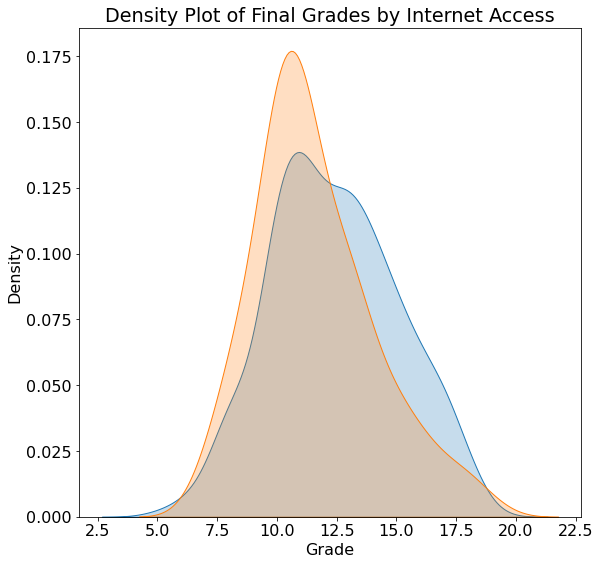

In [13]:
# Grade distribution by Internet
sns.kdeplot(df[df['internet']=='yes']['Grade'],label='Internet',shade=True)
sns.kdeplot(df[df['internet']=='no']['Grade'],label='No Internet',shade=True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Internet Access')

In [14]:
# Distribution of schools by address
schools = df.groupby(['school'])['address'].value_counts()
schools

school  address
GP      U          343
        R           78
MS      R          109
        U          103
Name: address, dtype: int64

***
**Grade Percentiles**

In [15]:
# Calculate percentile for grades

df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'],x))

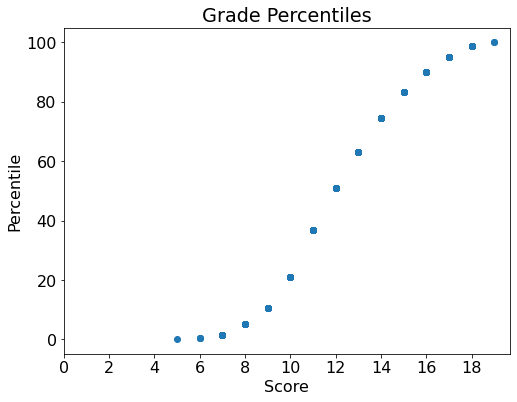

In [16]:
# Plot percentiels for grades
plt.figure(figsize=(8,6))
plt.plot(df['Grade'],df['percentile'],'o')
plt.xticks(range(0,20,2),range(0,20,2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

## Variable Selection

***
**Numerical Correlations w/Target**

In [17]:
df.corr()['Grade'].sort_values()

failures     -0.384569
absences     -0.204230
Dalc         -0.196891
Walc         -0.178839
traveltime   -0.129654
goout        -0.111228
freetime     -0.105206
health       -0.096461
age          -0.042505
famrel        0.072888
Fedu          0.204392
studytime     0.249855
Medu          0.278690
G1            0.874777
G2            0.942691
percentile    0.985253
Grade         1.000000
Name: Grade, dtype: float64

***
**Categorical Correlations using One-Hot Encoding**

In [18]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,11
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,11
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,12
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,14
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,13


In [19]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Grade'].sort_values()

higher_no           -0.343742
school_MS           -0.227632
Mjob_at_home        -0.158496
reason_course       -0.138195
internet_no         -0.131408
address_R           -0.128350
sex_M               -0.125755
guardian_other      -0.100802
schoolsup_yes       -0.098185
reason_other        -0.092382
activities_no       -0.078526
paid_yes            -0.067146
nursery_no          -0.056449
romantic_yes        -0.052050
Fjob_at_home        -0.049372
Fjob_services       -0.042497
Mjob_other          -0.035494
Fjob_other          -0.021292
famsize_GT3         -0.012957
guardian_mother     -0.008042
Pstatus_T           -0.001776
famsup_no           -0.001581
famsup_yes           0.001581
Pstatus_A            0.001776
Mjob_services        0.006210
famsize_LE3          0.012957
Fjob_health          0.026320
reason_home          0.046639
romantic_no          0.052050
nursery_yes          0.056449
guardian_father      0.066486
paid_no              0.067146
activities_yes       0.078526
Mjob_healt

***
**Select 6 most correlated variables with final score**

In [20]:
# Takes in a dataframe, finds most correlated variables with the grade and returns training and testing datasets

In [21]:
def format_data(df):
    labels = df['Grade']
    df = df.drop(columns=['school','G1','G2','percentile'])
    df = pd.get_dummies(df)
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    most_correlated = most_correlated[:8]
    df = df.loc[:,most_correlated.index]
    df = df.drop(columns=['higher_no'])
    X_train,X_Test,y_train,y_test=train_test_split(df,labels,test_size=0.25,random_state=42)
    return X_train,X_Test,y_train,y_test

In [22]:
X_train,X_test,y_train,y_test=format_data(df)
X_train.head()

,Grade,failures,higher_yes,Medu,studytime,Fedu,absences
619,13,0,1,3,2,3,6
323,10,0,1,4,1,3,0
201,16,0,1,2,2,1,0
410,17,0,1,2,2,2,0
426,11,0,1,3,1,3,4


***
**Rename Variables for Ease & Interpretability**

In [23]:
# Rename variables in train and test
X_train = X_train.rename(columns={'higher_yes':'higher_edu',
                                  'Medu':'mother_edu',
                                  'Fedu':'father_edu'})
X_test = X_test.rename(columns={'higher_yes':'higher_edu',
                                  'Medu':'mother_edu',
                                  'Fedu':'father_edu'})

In [24]:
X_train.head()

,Grade,failures,higher_edu,mother_edu,studytime,father_edu,absences
619,13,0,1,3,2,3,6
323,10,0,1,4,1,3,0
201,16,0,1,2,2,1,0
410,17,0,1,2,2,2,0
426,11,0,1,3,1,3,4


In [25]:
print(X_train.shape)
print(X_test.shape)

(474, 7)
(159, 7)


***
**Pair Plot of Selected Variables**

In [26]:
# Function for calculating correlation coefficient
def corrfunc(x,y,**kws):
    r, _ = stats.pearsonr(x,y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1,.6),xycoords=ax.transAxes,
                size=24)

In [27]:
cmap = sns.cubehelix_palette(light=1,dark=0.1,
                             hue=0.5,as_cmap=True)
sns.set_context(font_scale=2)


C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


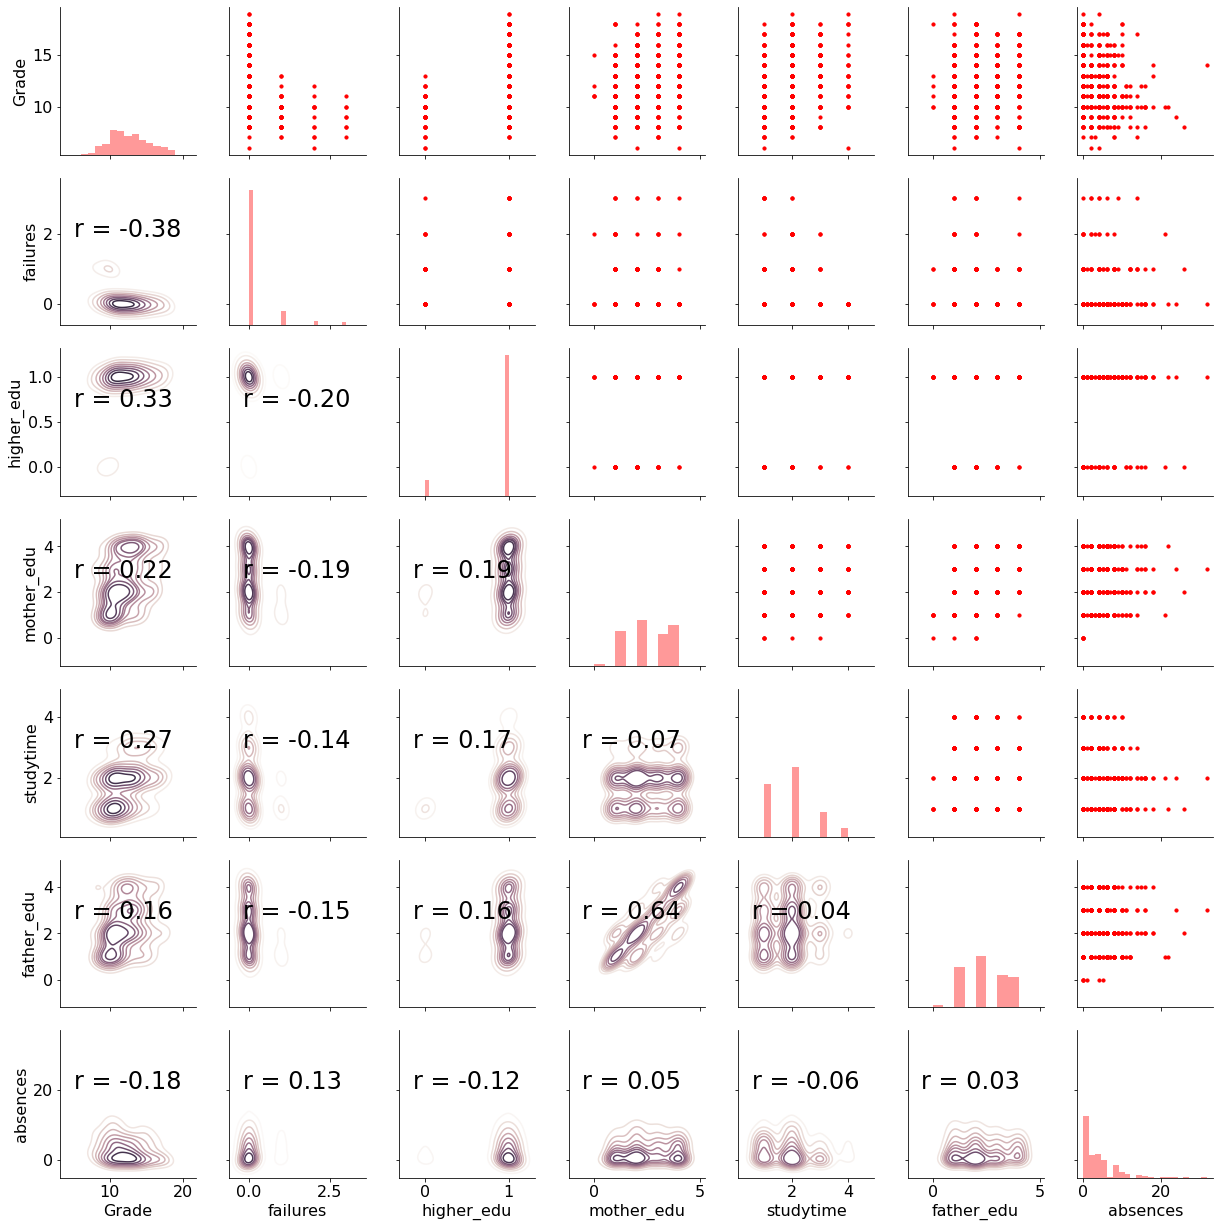

In [28]:
# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot,kde=False, color = 'red')

# Density plot and correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot,cmap=cmap)
g.map_lower(corrfunc);

***
**Selected Variables Distribution by Relation to Median**

In [29]:
# Create relation to the median grade column
X_plot = X_train.copy()
X_plot['relation_median'] = (X_plot['Grade'] >= 12)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})
X_plot = X_plot.drop(columns='Grade')

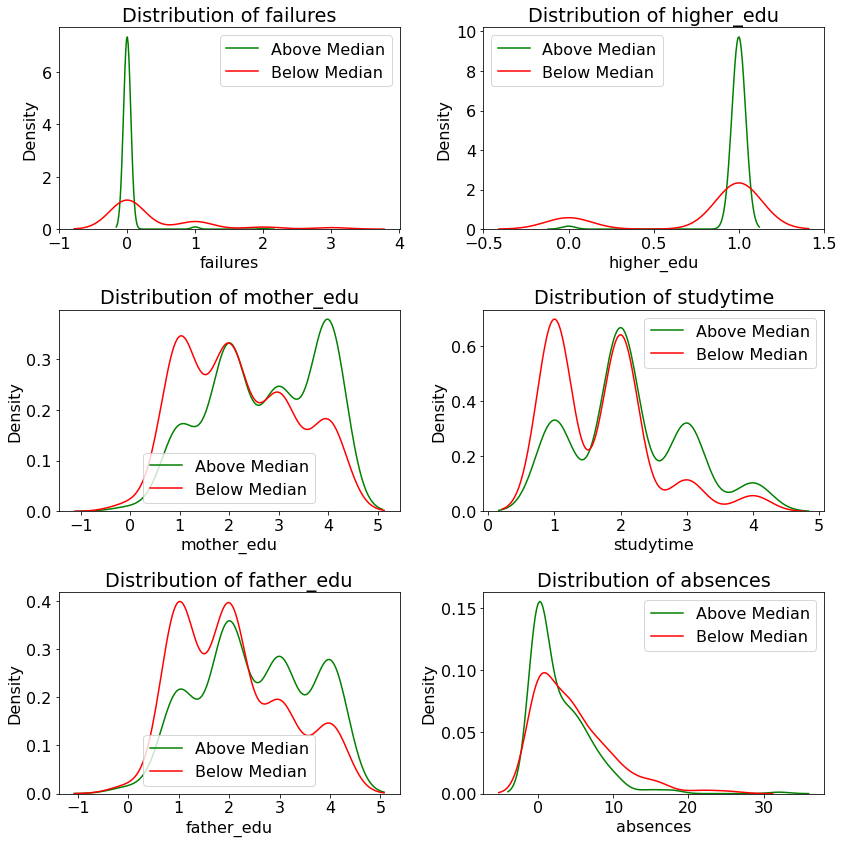

In [30]:
plt.figure(figsize=(12,12))
# Plot by the distribution of each variable colored
# by the relation to the median grade
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(3,2,i+1)
    subset_above = X_plot[X_plot['relation_median']=='above']
    subset_below = X_plot[X_plot['relation_median']=='below']
    sns.kdeplot(subset_above[col],label='Above Median',color='green')
    sns.kdeplot(subset_below[col],label='Below Median',color='red')
    plt.legend(); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

## Establish Modeling Benchmarks

***
**Metrics**
* Mean Absolute Error (MAE): Average of the absolute value of the difference between predictions and the true values
* Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and the true values

The mean absolute error is more interpretable, but the root mean squared error penalizes larger errors more heavily. Either one may be appropriate depending on the situation. 
[Here is a discussion](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d).

In [31]:
# Calculate MAE & RMSE
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions-true))
    rmse = np.sqrt(np.mean((predictions-true)**2))
    return mae,rmse

***
**Naive Baseline**
- For regression, a simple naive baseline is to guess the median value on the training set for all testing cases. If our ML model cannot better thsi simple baseline then perhaps we should try a different approach.

In [32]:
# Naive baseline is the median
median_pred = X_train['Grade'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Grade']

In [33]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds,true)
print('Median Baseline MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline MAE: 2.1761
Median Baseline RMSE: 2.6777


***
**Standard Machine Learning Models**

In [34]:
# Evaluate several ml models by training on training set and test on testing set
def evaluate(X_train,X_test,y_train,y_test):
    # name of models
    model_name_list = ['Linear Regression','ElasticNet Regression','Random Forest','Extra Trees','SVM','Gradient Boosted','Baseline']
    X_train = X_train.drop(columns='Grade')
    X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae','rmse'],index=model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1,model2,model3,model4,model5,model6]):
        model.fit(X_train,y_train)
        predictions=model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions-y_test))
        rmse = np.sqrt(np.mean((predictions-y_test)**2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name,:] = [mae,rmse]
        
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline',:] = [baseline_mae,baseline_rmse]
    
    return results   

In [35]:
results = evaluate(X_train,X_test,y_train,y_test)

***
**Visual Comparison of Models**

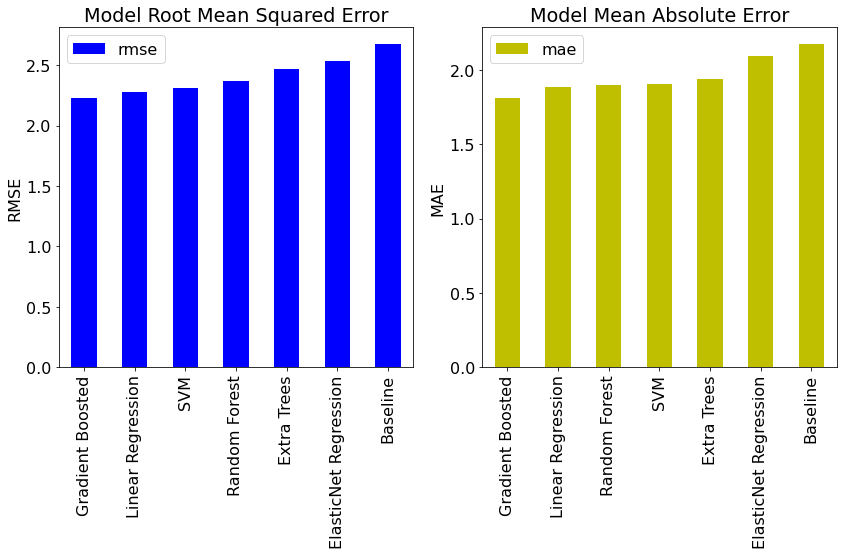

In [36]:
figsize(12,8)
matplotlib.rcParams['font.size']=16
# RMSE
ax = plt.subplot(1,2,1)
results.sort_values('rmse',ascending=True).plot.bar(y='rmse',color='b',ax=ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

# MAE
ax = plt.subplot(1,2,2)
results.sort_values('mae',ascending=True).plot.bar(y='mae',color='y',ax=ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');
                    
plt.tight_layout()

In [37]:
results

,mae,rmse
Linear Regression,1.885902,2.273953
ElasticNet Regression,2.09282,2.536563
Random Forest,1.894672,2.364825
Extra Trees,1.936956,2.46778
SVM,1.902624,2.308251
Gradient Boosted,1.812716,2.227371
Baseline,2.176101,2.67765


In [38]:
print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
      (100 * abs(results.loc['Gradient Boosted','mae'] - results.loc['Baseline','mae'])) / results.loc['Baseline','mae']))

The Gradient Boosted regressor is 16.70% better than the baseline.


***
**Formula from Ordinary Least Squares Linear Regression**

In [39]:
lr = LinearRegression()
lr.fit(X_train.drop(columns=['Grade']),y_train)

LinearRegression()

In [40]:
ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i,col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i],col)

' '.join(ols_formula.split(' ')[:-1])

'Grade = 9.19 + -1.32 * failures + 1.86 * higher_edu + 0.26 * mother_edu + 0.58 * studytime + 0.03 * father_edu + -0.07 * absences'

## Bayesian Linear Regression

In [41]:
# Formula for Bayesian Linear Regression - follows R formula syntax
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Grade ~ failures + higher_edu + mother_edu + studytime + father_edu + absences'

***
**Create model in PyMC3 & Sample from Posterior**
- Build the model using the formula above and a normal distribution for the data likelihood. Then use MCMC to draw samples from teh posterior to approximate the posterior for each model parameter.

In [42]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (optional: family)
    pm.GLM.from_formula(formula,data=X_train,family=family)
    
    # Perform Markov Chain MOnte Carlo sampling
    normal_trace = pm.sample(draws=2000,chains=2,tune=500)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\wallj\AppData\Local\Temp/ipykernel_15416/1646161498.py:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  normal_trace = pm.sample(draws=2000,chains=2,tune=500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, absences,

Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 5794 seconds.


***
**Examine Regression Results**

In [43]:
# Traceplot of all samples
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace,figsize=(14,len(trace.varnames)*1.8),
                      lines={k:v['mean'] for k,v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i,mn in enumerate(pm.summary(trace)['mean']):
        ax[i,0].annotate('{:0.2f}'.format(mn),xy=(mn,0),xycoords='data',
                         xytext=(-18,18),textcoords='offset points',rotation=90,
                         va='bottom',fontsize='large',color='red')

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
C:\Users\wallj\AppData\Local\Temp/ipykernel_15416/389669110.py:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(trace,figsize=(14,len(trace.varnames)*1.8),
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the

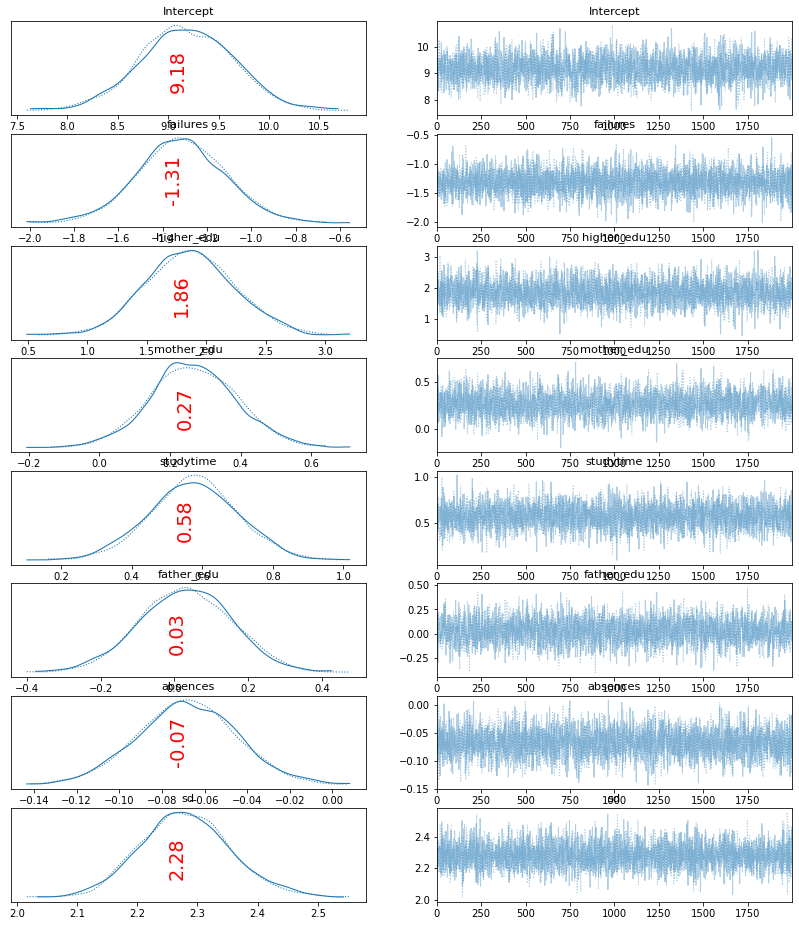

In [44]:
plot_trace(normal_trace)

C:\Users\wallj\AppData\Local\Temp/ipykernel_15416/1168672415.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(normal_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'failures'}>],
       [<AxesSubplot:title={'center':'higher_edu'}>,
        <AxesSubplot:title={'center':'higher_edu'}>],
       [<AxesSubplot:title={'center':'mother_edu'}>,
        <AxesSubplot:title={'center':'mother_edu'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'father_edu'}>,
        <AxesSubplot:title={'center':'father_edu'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'absences'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

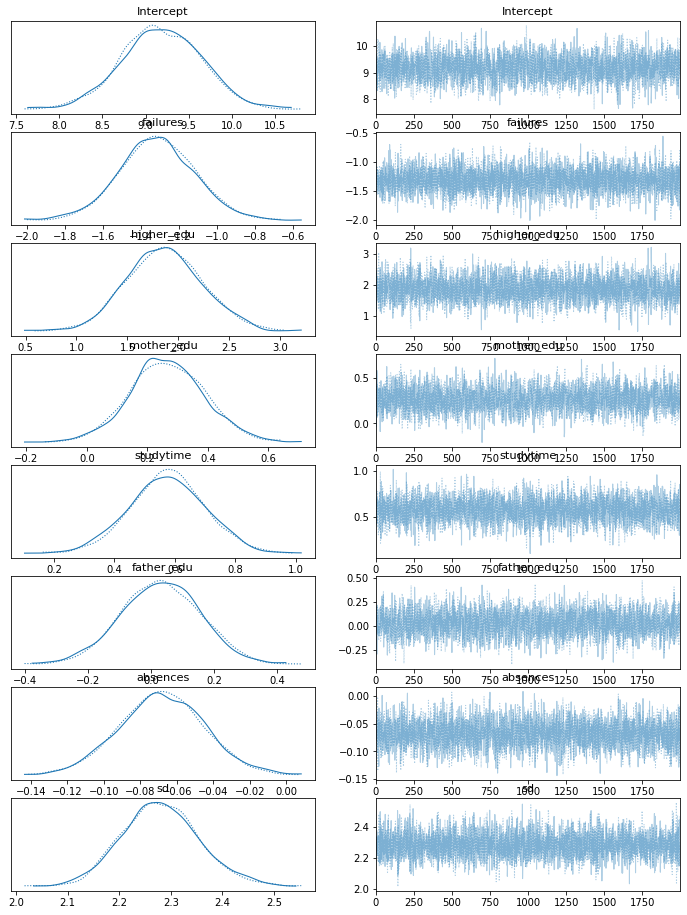

In [45]:
pm.traceplot(normal_trace)

- Left side: Marginal posterior (values on x, prob on y). Prob is determined by sampling. Colors indicate two chains. Right side are the values being chosen and chained
***

C:\Users\wallj\AppData\Local\Temp/ipykernel_15416/1268253099.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(normal_trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

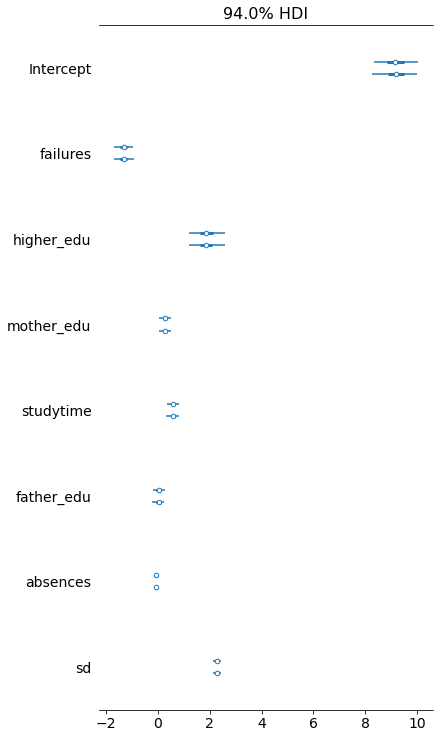

In [46]:
pm.forestplot(normal_trace)

- Forest Plot: most likely value of the parameter as well as the 95% credible interval. 
***

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


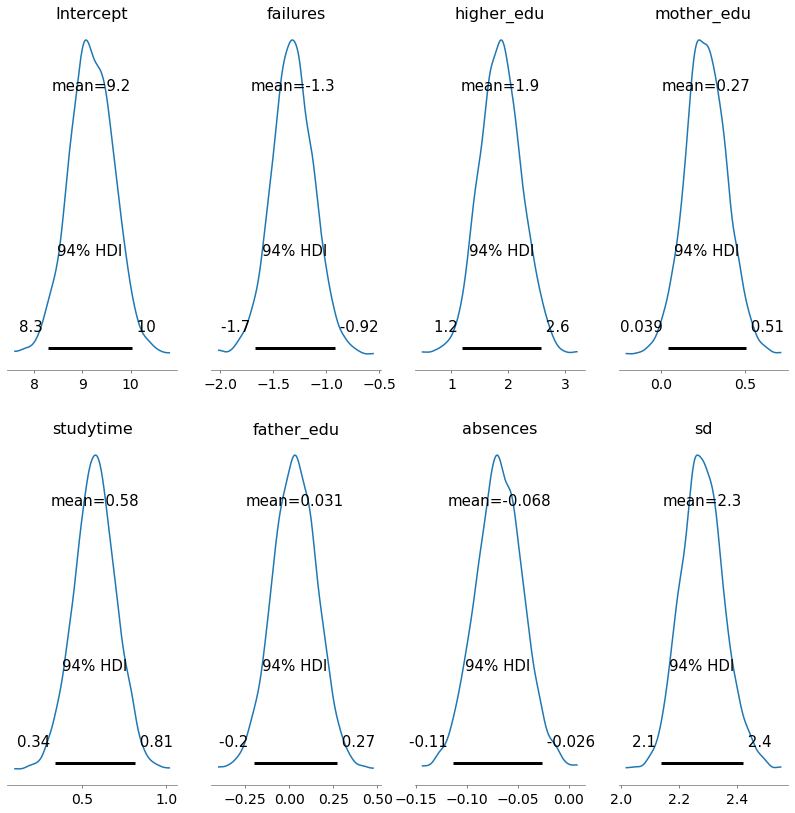

In [48]:
pm.plot_posterior(normal_trace,figsize=(14,14));

In [49]:
# Print out the mean variable weight from teh trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable,np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 9.1838
Variable: failures        Mean weight in model: -1.3147
Variable: higher_edu      Mean weight in model: 1.8642
Variable: mother_edu      Mean weight in model: 0.2664
Variable: studytime       Mean weight in model: 0.5762
Variable: father_edu      Mean weight in model: 0.0306
Variable: absences        Mean weight in model: -0.0681
Variable: sd_log__        Mean weight in model: 0.8241
Variable: sd              Mean weight in model: 2.2810


Interpretations of weights
- Previous class failures are negatively related to the students final grade
- Higher eduction ambitions are positively related to student grade
- Mother's and father's education levels are positively related to the students final grade
- Studying time per week is positively related to students final grade
- Absences are negatively related to students final grade

In [50]:
pm.summary(normal_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,9.184,0.463,8.284,10.020,0.009,0.006,2836.0,2760.0,1.0
failures,-1.315,0.198,-1.668,-0.917,0.003,0.002,3641.0,2647.0,1.0
higher_edu,1.864,0.376,1.193,2.582,0.007,0.005,2892.0,3027.0,1.0
mother_edu,0.266,0.123,0.039,0.506,0.002,0.002,2916.0,2970.0,1.0
studytime,0.576,0.125,0.343,0.811,0.002,0.001,3663.0,2886.0,1.0
father_edu,0.031,0.125,-0.203,0.268,0.002,0.002,2732.0,2787.0,1.0
absences,-0.068,0.023,-0.114,-0.026,0.000,0.000,3432.0,3109.0,1.0
sd,2.281,0.075,2.137,2.420,0.001,0.001,4742.0,2776.0,1.0


***
**Linear Formula from Bayesian Inference using Mean of Parameters**

In [51]:
model_formula = 'Grade = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]),variable)

' '.join(model_formula.split(' ')[:-1])

'Grade =  9.18 * Intercept + -1.31 * failures + 1.86 * higher_edu + 0.27 * mother_edu + 0.58 * studytime + 0.03 * father_edu + -0.07 * absences + 0.82 * sd_log__ + 2.28 * sd'

***
**Evaluate Bayesian Model using Mean of Model Parameters**

In [52]:
# Evaluate the MCMC Trace and Compare to ml models
def evaluate_trace(trace,X_train,X_test,y_train,y_test,model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict={}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into DataFrame
    var_weights = pd.DataFrame(var_dict)
    
    # Means fro all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept columns
    X_test['Intercept'] = 1
    
    # Align names of the test obersvations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:,names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index=X_test.index,columns=['estimate'])
    
    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means),np.array(row[1]))
        
    # Metrics
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Models MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae,rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR',:] = [mae,rmse]
    
    plt.figure(figsize=(12,8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1,2,1)
    model_results.sort_values('mae',ascending=True).plot.bar(y='mae',color='r',ax=ax)
    plt.title('Model MAE Comparison'); plt.ylabel('MAE')
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1,2,2)
    model_results.sort_values('rmse',ascending=True).plot.bar(y='rmse',color='b',ax=ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Models MAE: 1.8857
Model RMSE: 2.2735


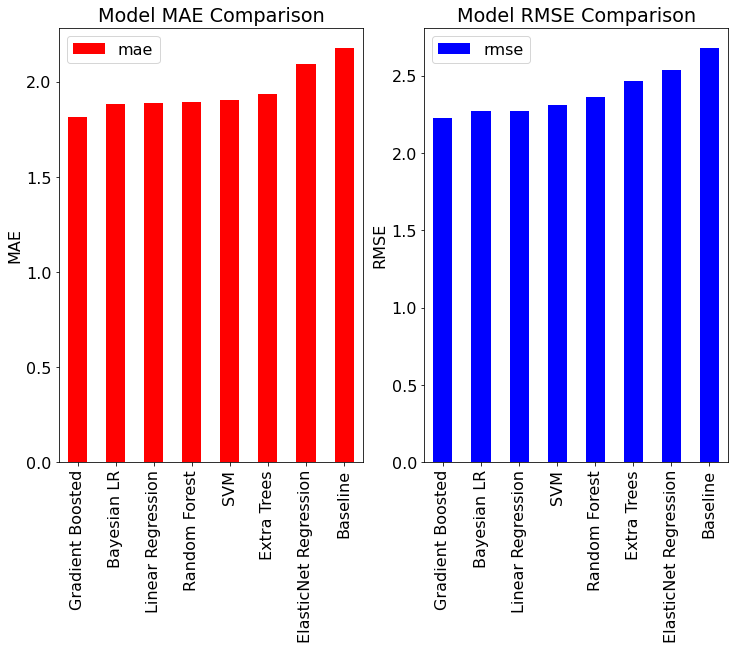

In [53]:
all_model_results = evaluate_trace(normal_trace,X_train,X_test,y_train,y_test,results)

In [54]:
all_model_results

,mae,rmse
Linear Regression,1.885902,2.273953
ElasticNet Regression,2.09282,2.536563
Random Forest,1.894672,2.364825
Extra Trees,1.936956,2.46778
SVM,1.902624,2.308251
Gradient Boosted,1.812716,2.227371
Baseline,2.176101,2.67765
Bayesian LR,1.885657,2.273543


## Make Predictions from Model

***
**Test Observations**

In [60]:
# Make a new prediction from teh test set and compare to the actual value
def test_model(trace,test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard Deviation of the likelihood
    sd_value = var_weights['sd'].mean()
    
    # Actual Value
    actual = test_observation['Grade']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('Grade')
    
    # Align wegihts and test observation
    var_weights = var_weights[test_observation.index]
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Location of mean for observation
    mean_loc = np.dot(var_means,test_observation)
    
    # Estimate of grade
    estimates = np.random.normal(loc = mean_loc,scale=sd_value,size=1000)
    
    # Plot all Estimates
    plt.figure(figsize=(8,8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor':'k','color':'darkblue'},
                 kde_kws = {'linewidth':4},
                 label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x=actual,ymin=0,ymax=5,
               linestyles = '--',colors='red',
               label = 'True Grade',
               linewidth = 2.5)
    # Plot the mean esimtate
    plt.vlines(x=mean_loc,ymin=0,ymax=5,
               linestyles = '--',colors='red',
               label = 'Mean Estimate',
               linewidth = 2.5)
    plt.legend(loc=1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    # Prediction information
    print('True Grade = %d' % actual)
    print('Average Esimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f 95%% Estimate = %0.4f' % (np.percentile(estimates,5),
                                                          np.percentile(estimates,95)))
    

Test Observation:
Grade         12
failures       0
higher_edu     1
mother_edu     2
studytime      1
father_edu     2
absences       8
Intercept      1
Name: 39, dtype: int64


C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


True Grade = 12
Average Esimate = 11.6732
5% Estimate = 8.0805 95% Estimate = 15.2443


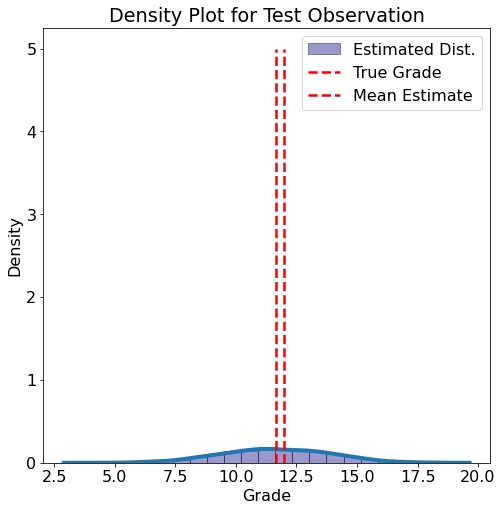

In [61]:
test_model(normal_trace,X_test.iloc[41])

Test Observation:
Grade         12
failures       0
higher_edu     1
mother_edu     1
studytime      2
father_edu     1
absences       6
Intercept      1
Name: 2, dtype: int64


C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\wallj\anaconda3\envs\justin_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


True Grade = 12
Average Esimate = 12.0887
5% Estimate = 8.1237 95% Estimate = 15.9802


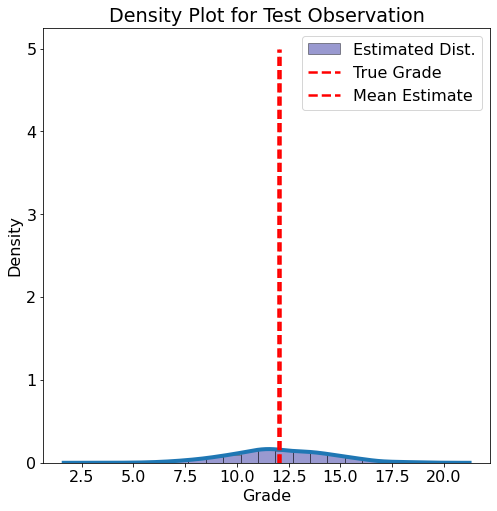

In [62]:
test_model(normal_trace, X_test.iloc[16])

***
**Prediction for Brand New Observation**

In [63]:
def query_model_t(trace,new_observation):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Align weights and new observation
    var_weights = var_weights[new_observations.index]
    
    # Means of variables
    var_means = var_weights.mean(axis=0)
    
    # Mean for observation
    mean_loc = np.dot(var_means,new_observation)
    
    # Distribution of Estimates
    estimates = mean_loc + np.random.standard_t(df = 2,size = 1000)
    
    plt.figure(figsize=(8,8))
    sns.distplot(estimates,hist=True,kde=True,bins=19,
                 hist_kws = {'edgecolor':'k','color':'darkblue'},
                 kde_kws = {'linewidth':4},
                 label = 'Estimated Dist.')
    plt.vlines(x=mean_loc,ymin=0,ymax=5,
               linestyles='-',colors='orange',linewidth=2.5)
    plt.title('Density Plot for New Observation');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f 95%% Estimate = 0.4f' % (np.percentile(estimtates,5),
                                                         np.percentile(estimates,95)))

In [64]:
observation = pd.Series({'Intercept':1,'mother_edu':4,'failures':0,'higher_edu':1,'studytime':3,'father_edu':1,'absences':1})

In [65]:
query_model(normal_trace,observation)

NameError: name 'query_model' is not defined

In [66]:
query_model_t(t_trace,observation)

NameError: name 't_trace' is not defined

***
***
***